In [1]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
with open('adaboost_train_80%.pickle', 'rb') as f:
    adaboost=pickle.load(f)
   

In [3]:
df=pd.read_csv("ATM_cash_flow_data_20%.csv")

In [4]:
# Convert 'Transaction Date' to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn
0,Big Street ATM,2013-02-13,90,28,62,125100,157200,WEDNESDAY,NH,W,WWW,282300
1,Christ College ATM,2015-10-20,149,82,67,517800,269100,Tuesday,NH,W,WWH,786900
2,Christ College ATM,2012-03-10,215,46,169,201100,621600,TUESDAY,N,H,WHW,822700
3,Mount Road ATM,2011-07-16,150,76,74,252400,197600,Saturday,NH,H,HHW,450000
4,KK Nagar ATM,2017-07-21,45,26,19,252100,106700,FRIDAY,NH,W,WWH,358800


In [5]:
# Convert the 'Transaction Date' column to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format="%d-%m-%Y")

# Create new columns for Year, Month, Day, and Weekday
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] =  df['Transaction Date'].dt.day
df['Weekday'] = df['Transaction Date'].dt.dayofweek

In [6]:
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn,Year,Month,Day
0,Big Street ATM,2013-02-13,90,28,62,125100,157200,2,NH,W,WWW,282300,2013,2,13
1,Christ College ATM,2015-10-20,149,82,67,517800,269100,1,NH,W,WWH,786900,2015,10,20
2,Christ College ATM,2012-03-10,215,46,169,201100,621600,5,N,H,WHW,822700,2012,3,10
3,Mount Road ATM,2011-07-16,150,76,74,252400,197600,5,NH,H,HHW,450000,2011,7,16
4,KK Nagar ATM,2017-07-21,45,26,19,252100,106700,4,NH,W,WWH,358800,2017,7,21


In [7]:
# Create new columns for sin and cos waves for the month
df['Sin_Month'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Cos_Month'] = np.cos(2 * np.pi * df['Month'] / 12)

df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn,Year,Month,Day,Sin_Month,Cos_Month
0,Big Street ATM,2013-02-13,90,28,62,125100,157200,2,NH,W,WWW,282300,2013,2,13,0.866025,5.000000e-01
1,Christ College ATM,2015-10-20,149,82,67,517800,269100,1,NH,W,WWH,786900,2015,10,20,-0.866025,5.000000e-01
2,Christ College ATM,2012-03-10,215,46,169,201100,621600,5,N,H,WHW,822700,2012,3,10,1.000000,6.123234e-17
3,Mount Road ATM,2011-07-16,150,76,74,252400,197600,5,NH,H,HHW,450000,2011,7,16,-0.500000,-8.660254e-01
4,KK Nagar ATM,2017-07-21,45,26,19,252100,106700,4,NH,W,WWH,358800,2017,7,21,-0.500000,-8.660254e-01


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Specify columns containing string values that need to be encoded
columns_to_encode = ['ATM Name','Working Day', 'Festival Religion','Holiday Sequence']

# Use LabelEncoder to encode string values to numeric
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [9]:
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn,Year,Month,Day,Sin_Month,Cos_Month
0,1,2013-02-13,90,28,62,125100,157200,2,4,1,7,282300,2013,2,13,0.866025,5.000000e-01
1,2,2015-10-20,149,82,67,517800,269100,1,4,1,6,786900,2015,10,20,-0.866025,5.000000e-01
2,2,2012-03-10,215,46,169,201100,621600,5,3,0,5,822700,2012,3,10,1.000000,6.123234e-17
3,4,2011-07-16,150,76,74,252400,197600,5,4,0,1,450000,2011,7,16,-0.500000,-8.660254e-01
4,3,2017-07-21,45,26,19,252100,106700,4,4,1,6,358800,2017,7,21,-0.500000,-8.660254e-01


In [10]:
# Assuming 'df' is your DataFrame
df.set_index('Transaction Date', inplace=True)

In [11]:
# Remove and return the column 'Total amount Withdrawn', and then reinsert it at the last position
df['Total amount Withdrawn'] = df.pop('Total amount Withdrawn')
df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
Transaction Date,,,,,,,,,,,,,,,,
2013-02-13,1,90,28,62,125100,157200,2,4,1,7,2013,2,13,0.866025,5.000000e-01,282300
2015-10-20,2,149,82,67,517800,269100,1,4,1,6,2015,10,20,-0.866025,5.000000e-01,786900
2012-03-10,2,215,46,169,201100,621600,5,3,0,5,2012,3,10,1.000000,6.123234e-17,822700
2011-07-16,4,150,76,74,252400,197600,5,4,0,1,2011,7,16,-0.500000,-8.660254e-01,450000
2017-07-21,3,45,26,19,252100,106700,4,4,1,6,2017,7,21,-0.500000,-8.660254e-01,358800


In [12]:
X = df.drop('Total amount Withdrawn' , axis = 1) # Features are all columns except the last one
y = df["Total amount Withdrawn"]   # Target variable is the last column


In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_scale= std.fit_transform(X)

In [14]:
y_reshape = y.to_numpy().reshape(-1, 1)
y_scale= std.fit_transform(y_reshape)

In [15]:
predictions = adaboost.predict(X_scale)

In [16]:
predictions

array([-0.76233564,  0.75081051,  0.87708612, ...,  0.35160668,
       -1.22761032,  0.75667661])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Squared Error (MSE)
mse = mean_squared_error(y_scale, predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_scale, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_scale,predictions)
print("Mean Absolute Error (MAE):", mae)

# Coefficient of Determination (R^2 Score)
r2 = r2_score(y_scale, predictions)
print("Coefficient of Determination (R^2 Score):", r2)


Mean Squared Error (MSE): 0.002734894145273674
Root Mean Squared Error (RMSE): 0.05229621540105626
Mean Absolute Error (MAE): 0.018826456577418455
Coefficient of Determination (R^2 Score): 0.9972651058547263


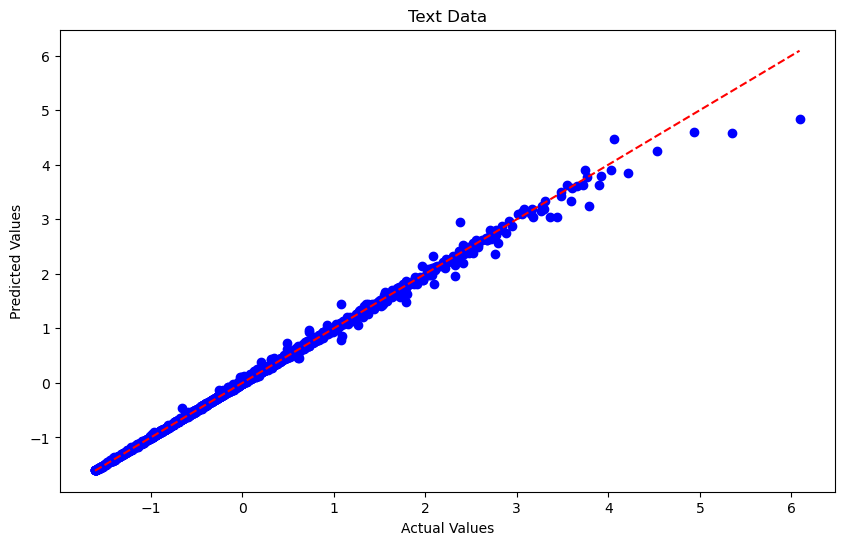

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_scale, predictions, color='blue')
plt.plot([min(y_scale), max(y_scale)], [min(y_scale), max(y_scale)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Text Data")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object

# Assuming 'predictions' contains the scaled predictions
predictions=predictions.reshape(-1,1)
# Inverse transform scaled predictions back to original scale
y_pred_rescaled = std.inverse_transform(predictions)

# Print the rescaled predictions
print(y_pred_rescaled)


[[280670.37209141]
 [781843.16374815]
 [823667.21430674]
 ...
 [649621.89877934]
 [126565.61856627]
 [783786.09030222]]


In [20]:
# Concatenate the two DataFrames side by side
original_test_df = pd.concat([X, y], axis=1)

# Display the concatenated DataFrame
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
Transaction Date,,,,,,,,,,,,,,,,
2013-02-13,1,90,28,62,125100,157200,2,4,1,7,2013,2,13,0.866025,5.000000e-01,282300
2015-10-20,2,149,82,67,517800,269100,1,4,1,6,2015,10,20,-0.866025,5.000000e-01,786900
2012-03-10,2,215,46,169,201100,621600,5,3,0,5,2012,3,10,1.000000,6.123234e-17,822700
2011-07-16,4,150,76,74,252400,197600,5,4,0,1,2011,7,16,-0.500000,-8.660254e-01,450000
2017-07-21,3,45,26,19,252100,106700,4,4,1,6,2017,7,21,-0.500000,-8.660254e-01,358800


In [21]:
# Create a new column in the DataFrame for the predicted values
original_test_df['Predicted_Value'] =y_pred_rescaled

# Display the DataFrame with the predicted values added
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value
Transaction Date,,,,,,,,,,,,,,,,,
2013-02-13,1,90,28,62,125100,157200,2,4,1,7,2013,2,13,0.866025,5.000000e-01,282300,280670.372091
2015-10-20,2,149,82,67,517800,269100,1,4,1,6,2015,10,20,-0.866025,5.000000e-01,786900,781843.163748
2012-03-10,2,215,46,169,201100,621600,5,3,0,5,2012,3,10,1.000000,6.123234e-17,822700,823667.214307
2011-07-16,4,150,76,74,252400,197600,5,4,0,1,2011,7,16,-0.500000,-8.660254e-01,450000,455942.799127
2017-07-21,3,45,26,19,252100,106700,4,4,1,6,2017,7,21,-0.500000,-8.660254e-01,358800,351740.580253


In [22]:
# Calculate individual error
original_test_df['Individual Error'] =original_test_df['Predicted_Value'] - original_test_df['Total amount Withdrawn']

# Display the DataFrame with the individual error column added
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value,Individual Error
Transaction Date,,,,,,,,,,,,,,,,,,
2013-02-13,1,90,28,62,125100,157200,2,4,1,7,2013,2,13,0.866025,5.000000e-01,282300,280670.372091,-1629.627909
2015-10-20,2,149,82,67,517800,269100,1,4,1,6,2015,10,20,-0.866025,5.000000e-01,786900,781843.163748,-5056.836252
2012-03-10,2,215,46,169,201100,621600,5,3,0,5,2012,3,10,1.000000,6.123234e-17,822700,823667.214307,967.214307
2011-07-16,4,150,76,74,252400,197600,5,4,0,1,2011,7,16,-0.500000,-8.660254e-01,450000,455942.799127,5942.799127
2017-07-21,3,45,26,19,252100,106700,4,4,1,6,2017,7,21,-0.500000,-8.660254e-01,358800,351740.580253,-7059.419747


In [23]:
original_test_df.to_csv("Test20%__20%_adaboost.csv", index=False)